**1. Prérequis**

**1.1. Travailler avec les fichiers et les dossiers**

Connexion au Drive Google

In [15]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Spécifier le chemin de dataset des images

In [16]:
data_path='/content/drive/MyDrive/mnist'

Lister les sous-dossiers

Note:  Utiliser la fonction os.listdir(path) qui retourne la liste des fichiers dans le dossier path

In [17]:
# Lister les sous-dossiers

import os
classes = os.listdir(data_path)
classes

['1', '0', '2']

joindre les chemins

Note: Utiliser la fonction os.path.join(path, sub_dir ou file) qui concat le chemin de dossier path à un nom de sous-dossier ou un nom de fichier dedans

In [18]:
#classe_0_path=#
# joindre les chemins

classe_0_path = os.path.join(data_path, classes[1])
classe_1_path = os.path.join(data_path, classes[2])
classe_2_path = os.path.join(data_path, classes[0])

print(classe_0_path)
print(classe_1_path)
print(classe_2_path)

/content/drive/MyDrive/mnist/0
/content/drive/MyDrive/mnist/2
/content/drive/MyDrive/mnist/1


Lister les noms des fichiers dans le dossier classe_0_path ?

Nommer la liste obtenue fichiers

In [19]:
# lister les noms des fichiers dans le dossier classe_0_path
fichiers= os.listdir(classe_0_path)

fichiers

['img_111.jpg',
 'img_146.jpg',
 'img_153.jpg',
 'img_129.jpg',
 'img_149.jpg',
 'img_108.jpg',
 'img_157.jpg',
 'img_1.jpg',
 'img_17.jpg',
 'img_114.jpg',
 'img_110.jpg',
 'img_141.jpg',
 'img_193.jpg',
 'img_196.jpg',
 'img_188.jpg',
 'img_203.jpg',
 'img_23.jpg',
 'img_183.jpg',
 'img_204.jpg',
 'img_201.jpg',
 'img_195.jpg',
 'img_200.jpg',
 'img_248.jpg',
 'img_273.jpg',
 'img_286.jpg',
 'img_322.jpg',
 'img_285.jpg',
 'img_272.jpg',
 'img_327.jpg',
 'img_267.jpg',
 'img_260.jpg',
 'img_251.jpg',
 'img_288.jpg',
 'img_264.jpg',
 'img_279.jpg',
 'img_276.jpg',
 'img_292.jpg',
 'img_373.jpg',
 'img_508.jpg',
 'img_5.jpg',
 'img_556.jpg',
 'img_404.jpg',
 'img_435.jpg',
 'img_538.jpg',
 'img_433.jpg',
 'img_344.jpg',
 'img_357.jpg',
 'img_54.jpg',
 'img_418.jpg',
 'img_375.jpg',
 'img_412.jpg',
 'img_555.jpg',
 'img_502.jpg',
 'img_585.jpg',
 'img_486.jpg',
 'img_4.jpg',
 'img_403.jpg',
 'img_366.jpg',
 'img_552.jpg',
 'img_542.jpg',
 'img_603.jpg',
 'img_472.jpg',
 'img_601.jpg',
 

La liste obtenue contizent des noms des fichiers d'images dans le dossier classe_0_path.

Composer le chemin de la première image de la liste fichiers

Lui donner le nom image_path

In [20]:
image_path= os.path.join(classe_0_path, fichiers[0])
image_path

'/content/drive/MyDrive/mnist/0/img_111.jpg'

**1.2. Travailler avec les images**

Lire une image

Note: Utiliser la fonction imread() de module skimage.io

Donner le nom I à ll'image chargée en mémoire

In [21]:
from skimage.io import imread

I=imread(image_path)

Propriétés de l'objet image

Afficher le type de l'image chargée en mémoire I

In [22]:
# I type
type(I)

numpy.ndarray

Afficher le shape de l'image chargée en mémoire I

In [23]:
I.shape

(28, 28)

Afficher le type des données (les niveaux de gris) de l'image I

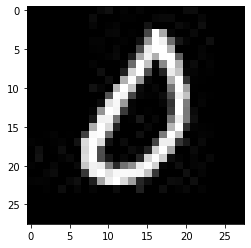

In [24]:
#show grayScale image
import matplotlib.pyplot as plt
plt.imshow(I, cmap='gray')

Afficher une image sur la console

Note :  Utiliser la fonction imshow(image, cmap='gray') de module matplotlib.pyplot

(-0.5, 27.5, 27.5, -0.5)

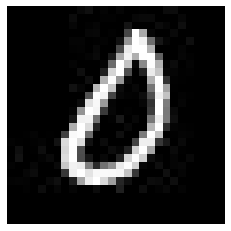

In [25]:
#Afficher une image sur la console avec la fonction imshow
plt.imshow(I, cmap='gray')
# remove axis
plt.axis('off')


Opérations de base sur une image

In [26]:
# rendre l'image un vecteur avec la fonction reshape()
I1= I.reshape(1,28*28)
I1.shape

(1, 784)

In [27]:
# rendre l'image un vecteur avec la fonction reshape()
I1= I.reshape(1,28*28)
I1.shape

(1, 784)

In [28]:
# rendre l'image un vecteur avec la fonction flatten()
I1= I.flatten()
I1.shape

(784,)

In [29]:
# Découper une partie de l'image 
# Exemple de pixel 10 -> pixel 20 sur l'axe des x et l'axe des y
I1= I[10:20,10:20]
I1.shape

(10, 10)

(-0.5, 9.5, 9.5, -0.5)

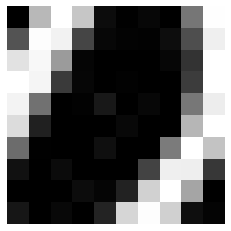

In [30]:
# Afficher I1
plt.imshow(I1, cmap='gray')
plt.axis('off')

In [31]:
# Changer la resolution de l'image
# Utiliser la fonction resize
from skimage.transform import resize

I1= resize(I, (10,10))
I1.shape

(10, 10)

(-0.5, 9.5, 9.5, -0.5)

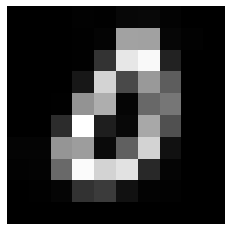

In [32]:
# Afficher I1
plt.imshow(I1, cmap='gray')
plt.axis('off')

**2. Classification des images**

Nous allons effectuer la classification des images en utlisant la technique KNN.

Les données sont les images des digits 0, 1 et 2 de dataset mnist sur Google Drive.

Nous allons commencer par charger les données en utilisant les prérequis vus ci-dessus.

Puis, nous allons les préparer pour pourvoir les utiliser en classification.

**2.1. Charger les images à partir de Google Drive**

Parcourir le dossier mnist.

Structure du dossier mnist:

        mnist
          |------0
                  |----image0.jpg
                  |----image1.jpg
                  ....
          |------1
                  |----image0.jpg
                  |----image1.jpg
                  ....
          |------2
                  |----image0.jpg
                  |----image1.jpg
                  ....
                  
Vous allez mettre dans les variables suivantes :
- images : les chemins de toutes les images.
- labels : les classes (soit 0 soit 1 soit 2) auxquels appartiennent les images de la liste images

Le résultat sera normalement comme suit :

la liste images:

        ['/content/drive/MyDrive/Colab Notebooks/irm2/data/mnist/0/img_108.jpg',
        '/content/drive/MyDrive/Colab Notebooks/irm2/data/mnist/0/img_157.jpg', ...]

 la liste labels:

        ['0', '0', ....]


In [34]:
import os

# data_path='/content/drive/MyDrive/Colab Notebooks/irm2/data/mnist'
data_path = "/content/drive/MyDrive/mnist"
images=[]
labels=[]
for classe_name in os.listdir(data_path):
  classe_path = os.path.join(data_path, classe_name)
  for file in os.listdir(classe_path):
    image_path = os.path.join(classe_path, file)
    images.append(image_path)
    labels.append(classe_name)

**2.2. Diviser les données en entrée et sortie**

Dans le problème de classification des images:
- Les images (leurs chemins) sont considérés comme les entrées
- Les labels des images sont considérés comme les sorties

Donc, donner le nom X à  la liste images et le nom y à la liste labels.

In [35]:
X=images
y=labels

**2.3. Diviser les données en train et test**

Utiliser la fonction train_test_split pour diviser X et y en train et test:

Normalment:
- les entrées X sont divisées en X_train et X_test
- les sorties y sont divisées en y_train et y_test

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.6, stratify=y)

**2.4. Traitement des données de train d'entrée**

L'image chargée en mémoire est un objet mathématique de deux dimensions (matrice).

On a besoin de la représenter sous la forme d'un vecteur pour faire apprendre un modèle de Machine Learning.

Travail demandé:

      Pour chaque image de X_train faire:
          lire une image
          Transformer l'image en vecteur
          Ajouter le vecteur dans une liste X_train_
      Transformer X_train_ en matrice (utiliser np.array())

In [37]:
from skimage.io import imread
import numpy as np
X_train_=[]
for image_path in X_train:
  I=imread(image_path)
  x=I.flatten()
  X_train_.append(x)
X_train_=np.array(X_train_)

**2.5. Apprentissage de classifieur**

Apprendre le modèle KNN avec X_train_ et y_train

In [38]:
from sklearn.neighbors  import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_,y_train)

KNeighborsClassifier(n_neighbors=2)

**2.6. Traitement des données de test d'entrée**

Appliquer le même traitement (fait sur X_train) sur X_test

Normalement, le traitement donne lieu au matrice X_test_

In [39]:
from skimage.io import imread
import numpy as np
X_test_=[]
for image_path in X_test:
  I=imread(image_path)
  x=I.flatten()
  X_test_.append(x)
X_test_=np.array(X_test_)

**2.7. Evaluation du classifieur**

Prédire les labels y_test_predicted à partir des données de test X_test_

In [41]:
y_test_predicted=knn.predict(X_test_)
y_test_predicted

array(['0', '1', '2', '1', '0', '2', '0', '1', '0', '0', '0', '2', '1',
       '1', '0', '2', '2', '0', '1', '1', '1', '0', '2', '2', '2', '2',
       '1', '1', '1', '1', '2', '1', '0', '0', '0', '0', '2', '0', '0',
       '1', '2', '1', '0', '0', '1', '0', '1', '1', '1', '2', '1', '1',
       '0', '1', '2', '1', '2', '1', '1', '2', '2', '1', '0', '1', '1',
       '2', '1', '2', '1', '0', '1', '2', '1', '0', '1', '2', '0', '0',
       '2', '1', '0', '0', '1', '2', '0', '0', '0', '2', '1', '0', '2',
       '0', '2', '0', '2', '0', '0', '0', '1', '2', '2', '2', '0', '0',
       '1', '1', '2', '0', '0', '1', '2', '2', '1', '2', '2', '1', '2',
       '1', '0', '1'], dtype='<U1')

Afficher les mesures de performance

Score accurracy

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("accuracy=%.2f" % (accuracy_score(y_test, y_test_predicted)*100))

accuracy=95.00


Matrice de confusion

In [43]:
M=confusion_matrix(y_test, y_test_predicted)
M

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  5, 35]])

In [44]:
knn.classes_

array(['0', '1', '2'], dtype='<U1')

In [45]:
import pandas as pd

pd.DataFrame(M,
             index=knn.classes_,
             columns=knn.classes_)

,0,1,2
0,40,0,0
1,0,39,1
2,0,5,35


Rappel (recall) et précision apr classe

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.89      0.97      0.93        40
           2       0.97      0.88      0.92        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



**3. Déploiement du modèle**

**3.1. Enregistrer le modèle sur le drive**

Note : 

Utiliser les fonctions: 
- la fonction open() pour ouvrir un fichier en mode binaire+écriture. 

  Dans ce fichier, on va enregistrer notre modèle
- la fonction dump() du module pickle qui va écrire le modèle dans le fichier

In [47]:
# Enregistrer le modèle avec la fonction dump du modile pickle 
import pickle
pickle.dump(knn, open('knn.pkl', 'wb'))

**3.2. Charger le modèle à partir du Drive**

Charger le modèle à partir du Google Drive et l'utiliser pour prédire la classe d'une image quelconque ?

Note : 

Utiliser les fonctions: 
- la fonction open() pour ouvrir le fichier (en mode binaire+lecture) qui contient le modèle
- la fonction load() du module pickle pour charger le contenu du fichier ouvert et récuprérer le modèle de drive

In [48]:
# Charger le modèle avec la fonction load du modile pickle
knn_loaded = pickle.load(open('knn.pkl', 'rb'))

# Tester le modèle chargé
y_test_predicted_loaded=knn_loaded.predict(X_test_)
y_test_predicted_loaded

array(['0', '1', '2', '1', '0', '2', '0', '1', '0', '0', '0', '2', '1',
       '1', '0', '2', '2', '0', '1', '1', '1', '0', '2', '2', '2', '2',
       '1', '1', '1', '1', '2', '1', '0', '0', '0', '0', '2', '0', '0',
       '1', '2', '1', '0', '0', '1', '0', '1', '1', '1', '2', '1', '1',
       '0', '1', '2', '1', '2', '1', '1', '2', '2', '1', '0', '1', '1',
       '2', '1', '2', '1', '0', '1', '2', '1', '0', '1', '2', '0', '0',
       '2', '1', '0', '0', '1', '2', '0', '0', '0', '2', '1', '0', '2',
       '0', '2', '0', '2', '0', '0', '0', '1', '2', '2', '2', '0', '0',
       '1', '1', '2', '0', '0', '1', '2', '2', '1', '2', '2', '1', '2',
       '1', '0', '1'], dtype='<U1')

**3.3. Prédiction de la classe d'une nouvelle image**

Dans un script Python (.py), vous allez utiliser le modèle obtenu dans ce notebook pour décider pour une image si elle correpond au chiffre 0 , 1 ou 2

In [49]:
# Tester le modèle chargé
y_test_predicted_loaded=knn_loaded.predict(X_test_)
y_test_predicted_loaded

array(['0', '1', '2', '1', '0', '2', '0', '1', '0', '0', '0', '2', '1',
       '1', '0', '2', '2', '0', '1', '1', '1', '0', '2', '2', '2', '2',
       '1', '1', '1', '1', '2', '1', '0', '0', '0', '0', '2', '0', '0',
       '1', '2', '1', '0', '0', '1', '0', '1', '1', '1', '2', '1', '1',
       '0', '1', '2', '1', '2', '1', '1', '2', '2', '1', '0', '1', '1',
       '2', '1', '2', '1', '0', '1', '2', '1', '0', '1', '2', '0', '0',
       '2', '1', '0', '0', '1', '2', '0', '0', '0', '2', '1', '0', '2',
       '0', '2', '0', '2', '0', '0', '0', '1', '2', '2', '2', '0', '0',
       '1', '1', '2', '0', '0', '1', '2', '2', '1', '2', '2', '1', '2',
       '1', '0', '1'], dtype='<U1')